<a href="https://colab.research.google.com/github/jeffrey82221/colab/blob/main/PracticeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 練習題說明：　

該數據集來自 UCI 機器學習存儲庫，是關於葡萄牙銀行的電話營銷活動。分類目標是預測客戶是否會訂閱定期存款（變量 y：0/1）。


Ref: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


# 資料下載：

---

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv


In [1]:
!wget https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

--2022-01-18 01:44:48--  https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4882918 (4.7M) [text/plain]
Saving to: ‘banking.csv’

banking.csv         100%[===================>]   4.66M  --.-KB/s    in 0.05s   

2022-01-18 01:44:49 (102 MB/s) - ‘banking.csv’ saved [4882918/4882918]



# 資料檢視

---

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)



In [11]:
import pandas as pd
data = pd.read_csv('banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# 資料處理

--- 
1. 合併基礎教育程度 
2. 將類別型欄位進行One-hot Encoding


In [12]:
import numpy as np
# 合併基礎教育程度 (basic.9y/basic.6y/basic.4y -> Basic)
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
# 將類別型欄位進行One-hot Encoding
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]

# 建立LightGBM 模型

In [19]:
import warnings
warnings.filterwarnings("ignore")

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定義X,y

X = data_final.values[:,:-1]
y = data_final.values[:, -1]

# 切分出training/testing資料集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:

import lightgbm as lgb
from lightgbm import LGBMClassifier

# 建立LightGBM模型
classifier = lgb.LGBMClassifier(objective = 'binary', 
                 learning_rate = 0.05, 
                 n_estimators = 100, 
                 random_state=0)

# 進行GridSearch 

In [ ]:
# [Step.1.] 建立要嘗試的參數為一個dictionary
param_grid = {
    'num_leaves': [30, 40], 
    'feature_fraction': [0.2, 0.3],
    'bagging_fraction': [0.6, 0.7],
    'max_depth':[3, 5, 7],
    'max_bin':[20],
    'lambda_l1':[0.3, 0.6],
    'lambda_l2':[0.08, 0.09],
    'min_split_gain':[0.04, 0.05],
    'min_child_weight':[7]
}

# [Step.2.] 建立gridsearch物件
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(classifier, param_grid)

# [Step.3.] 進行gridsearch運算
gridsearch.fit(X_train, y_train)

# 訓練結果檢視

In [ ]:
# Final Model
print('Start predicting...')
LGBM = lgb.LGBMClassifier(objective = 'binary',
                         learning_rate = 0.05, 
                         n_estimators = 100, 
                         random_state=0,
                         num_leaves = gridsearch.best_params_['num_leaves'],
                         feature_fraction = gridsearch.best_params_['feature_fraction'], 
                         bagging_fraction = gridsearch.best_params_['bagging_fraction'],
                         max_depth = gridsearch.best_params_['max_depth'],
                         max_bin = gridsearch.best_params_['max_bin'],
                         lambda_l1 = gridsearch.best_params_['lambda_l1'],
                         lambda_l2 = gridsearch.best_params_['lambda_l2'],
                         min_split_gain = gridsearch.best_params_['min_split_gain'],
                         min_child_weight = gridsearch.best_params_['min_child_weight'])
%time LGBM_fit = LGBM.fit(X_train, y_train)
print('Predicting is over')

# 模型因子重要度視覺化(SHAP)

In [ ]:
# LightGBM
import warnings
warnings.filterwarnings("ignore")

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Book_Purchased.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

import lightgbm as lgb
from lightgbm import LGBMClassifier

# 建立參數
param_grid = {
    'num_leaves': [30, 40], 
    'feature_fraction': [0.2, 0.3],
    'bagging_fraction': [0.6, 0.7],
    'max_depth':[3, 5, 7],
    'max_bin':[20],
    'lambda_l1':[0.3, 0.6],
    'lambda_l2':[0.08, 0.09],
    'min_split_gain':[0.04, 0.05],
    'min_child_weight':[7]
}

# 建立LightGBM模型
classifier = lgb.LGBMClassifier(objective = 'binary', 
                                learning_rate = 0.05, 
                                n_estimators = 100, 
                                random_state=0)
# GridSearchCV
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(classifier, param_grid)

# 使用訓練資料訓練模型
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(learning_rate=0.05, objective='binary',
                                      random_state=0),
             param_grid={'bagging_fraction': [0.6, 0.7],
                         'feature_fraction': [0.2, 0.3],
                         'lambda_l1': [0.3, 0.6], 'lambda_l2': [0.08, 0.09],
                         'max_bin': [20], 'max_depth': [3, 5, 7],
                         'min_child_weight': [7],
                         'min_split_gain': [0.04, 0.05],
                         'num_leaves': [30, 40]})

In [ ]:
# Final Model
print('Start predicting...')
LGBM = lgb.LGBMClassifier(objective = 'binary',
                         learning_rate = 0.05, 
                         n_estimators = 100, 
                         random_state=0,
                         num_leaves = gridsearch.best_params_['num_leaves'],
                         feature_fraction = gridsearch.best_params_['feature_fraction'], 
                         bagging_fraction = gridsearch.best_params_['bagging_fraction'],
                         max_depth = gridsearch.best_params_['max_depth'],
                         max_bin = gridsearch.best_params_['max_bin'],
                         lambda_l1 = gridsearch.best_params_['lambda_l1'],
                         lambda_l2 = gridsearch.best_params_['lambda_l2'],
                         min_split_gain = gridsearch.best_params_['min_split_gain'],
                         min_child_weight = gridsearch.best_params_['min_child_weight'])
%time LGBM_fit = LGBM.fit(X_train, y_train)
print('Predicting is over')

Start predicting...
CPU times: user 19.5 ms, sys: 2.87 ms, total: 22.3 ms
Wall time: 12 ms
Predicting is over


In [ ]:
# Function for Measure Performance# 
from  sklearn  import  metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_roc_auc = True):
    y_pred = clf.predict(X)
    y_predprob = clf.predict_proba(X)[:,1]
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred))),"\n"

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred)),"\n"
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred)),"\n"  
        
    if show_roc_auc:
        print("ROC AUC Score")
        print(metrics.roc_auc_score(y,y_predprob)),"\n"

Accuracy:0.840
Classification report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        67
           1       0.76      0.76      0.76        33

    accuracy                           0.84       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.84      0.84      0.84       100

Confusion matrix
[[59  8]
 [ 8 25]]
ROC AUC Score
0.9151967435549525
Feature importances: [156, 173]
Plot feature importances...


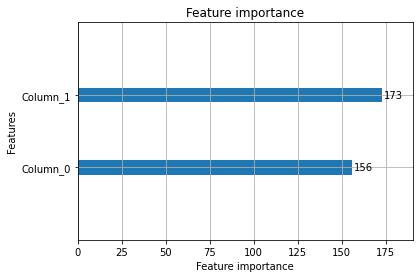

In [ ]:
# performance
LGBM_grid_measure = measure_performance(X=X_test, y=y_test, clf=LGBM_fit, show_classification_report=True, show_confusion_matrix=True)

# feature importances
print('Feature importances:', list(LGBM_fit.feature_importances_))

# visualization
print('Plot feature importances...')
ax = lgb.plot_importance(LGBM_fit, max_num_features=len(dataset))
plt.show()

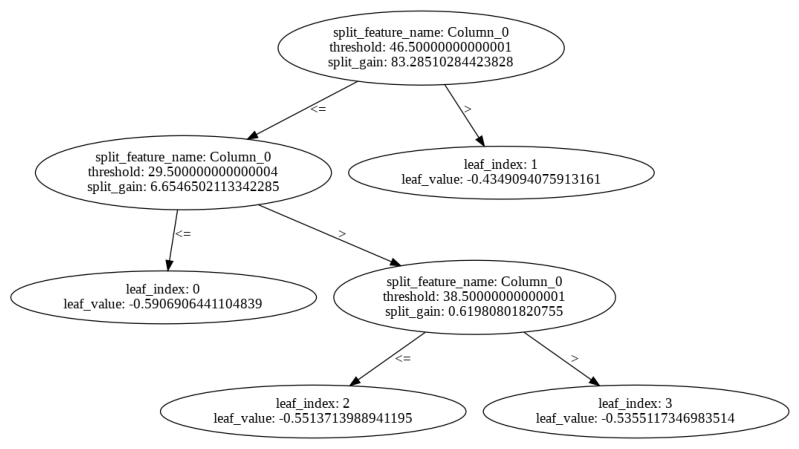

In [ ]:
ax = lgb.plot_tree(LGBM_fit, figsize=(20, 8), show_info=['split_gain'])
plt.show()